In [1]:
%matplotlib inline
%run ./lorenz_system.py
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from matplotlib import cm
import matplotlib
import numpy as np
import urllib2
import random
import math

In [2]:
num_pressure_systems = 4
max_border_length = 50
low_pressure = 'blue'
high_pressure = 'red'
center_x = center_y = 0
x='x'
y='y'
t='t'
pressure_types = [low_pressure, high_pressure]
pressure_systems = []

Initialize systems with random starting points and pressure types.

In [3]:
for i in range(num_pressure_systems):
    pressure_systems.append({'x': [], 'y':[],'t':random.choice(pressure_types)})
    
    # give random coordinate for first point
    pressure_systems[i][x].append(random.randrange(-max_border_length, max_border_length))
    pressure_systems[i][y].append(random.randrange(-max_border_length, max_border_length))

In [4]:
def plot_points():
    fig = plt.figure()
    ax = fig.gca()
    
    # set plot details
    fig.set_figheight(max_border_length)
    fig.set_figwidth(max_border_length)

    # set axis limits
    limit_max = max_border_length + 2
    ax.set_ylim(-limit_max, limit_max)
    ax.set_xlim(-limit_max, limit_max)
    
    # plot each system
    for system in pressure_systems:
        ax.plot(system[x], system[y], '*-', color=system[t])

In [5]:
def convert_to_unit_coordinates(index, size):
    # calculate length
    length = math.sqrt(pow(pressure_systems[index][x][size],2) + pow(pressure_systems[index][y][size],2))
    
    # return both points cnoverted into unit vector
    return pressure_systems[index][x][size] / length, pressure_systems[index][y][size] / length, length

In [6]:
def calculate_perpindicular_vector(x_cor, y_cor):
    # http://mathworld.wolfram.com/PerpendicularVector.html
    return -y_cor, x_cor

In [7]:
def bound_coordinate(cor):
    if cor < max_border_length and cor > -max_border_length:
        return cor
    elif cor < 0:
        return -max_border_length
    return max_border_length

This will simulate a step in time where the two pressure systems interact with eachother. For reference the following list shows what happens when there are two systems.
1. low and high: clockwise rotation
2. high and high: away from
3. low and low: away from

In [8]:
def simulate_step():
    for i in range(num_pressure_systems):
        # get index for current length of arrays before the appends begin
        size  = len(pressure_systems[i][x]) - 1
        
        # get unity vector conversions for index i
        i_unit_x, i_unit_y, dist = convert_to_unit_coordinates(i,size)
        x_forces = y_forces = 0

        # apply forces from other systems
        for j in range(num_pressure_systems):
            # ignore this current pressure system
            if i == j:
                continue
                
            # get unit vector conversions for index j
            j_unit_x, j_unit_y, bad_dist = convert_to_unit_coordinates(j,size)
            
            ## Forces applies by pressure systems
            # calculate vector differerences 
            x_force = i_unit_x - j_unit_x
            y_force = i_unit_y - j_unit_y

            # check if pressure system types match
            if pressure_systems[i][t] != pressure_systems[j][t]:
                # calculate vector differerences so they pull towards eachother 
                # and get perpindicular result
                x_force, y_force = calculate_perpindicular_vector(-x_force, -y_force)
            
            x_forces += x_force
            y_forces += y_force
                
        ## Forces applied by center of system
        c_x_force = -i_unit_x * 2
        c_y_force = -i_unit_y * 2
        
        # calculate new values
        x_total = pressure_systems[i][x][size] + x_forces + c_x_force
        y_total = pressure_systems[i][y][size] + y_forces + c_y_force

        # add new coordinates to lists
        pressure_systems[i][x].append(bound_coordinate(x_total))
        pressure_systems[i][y].append(bound_coordinate(y_total))

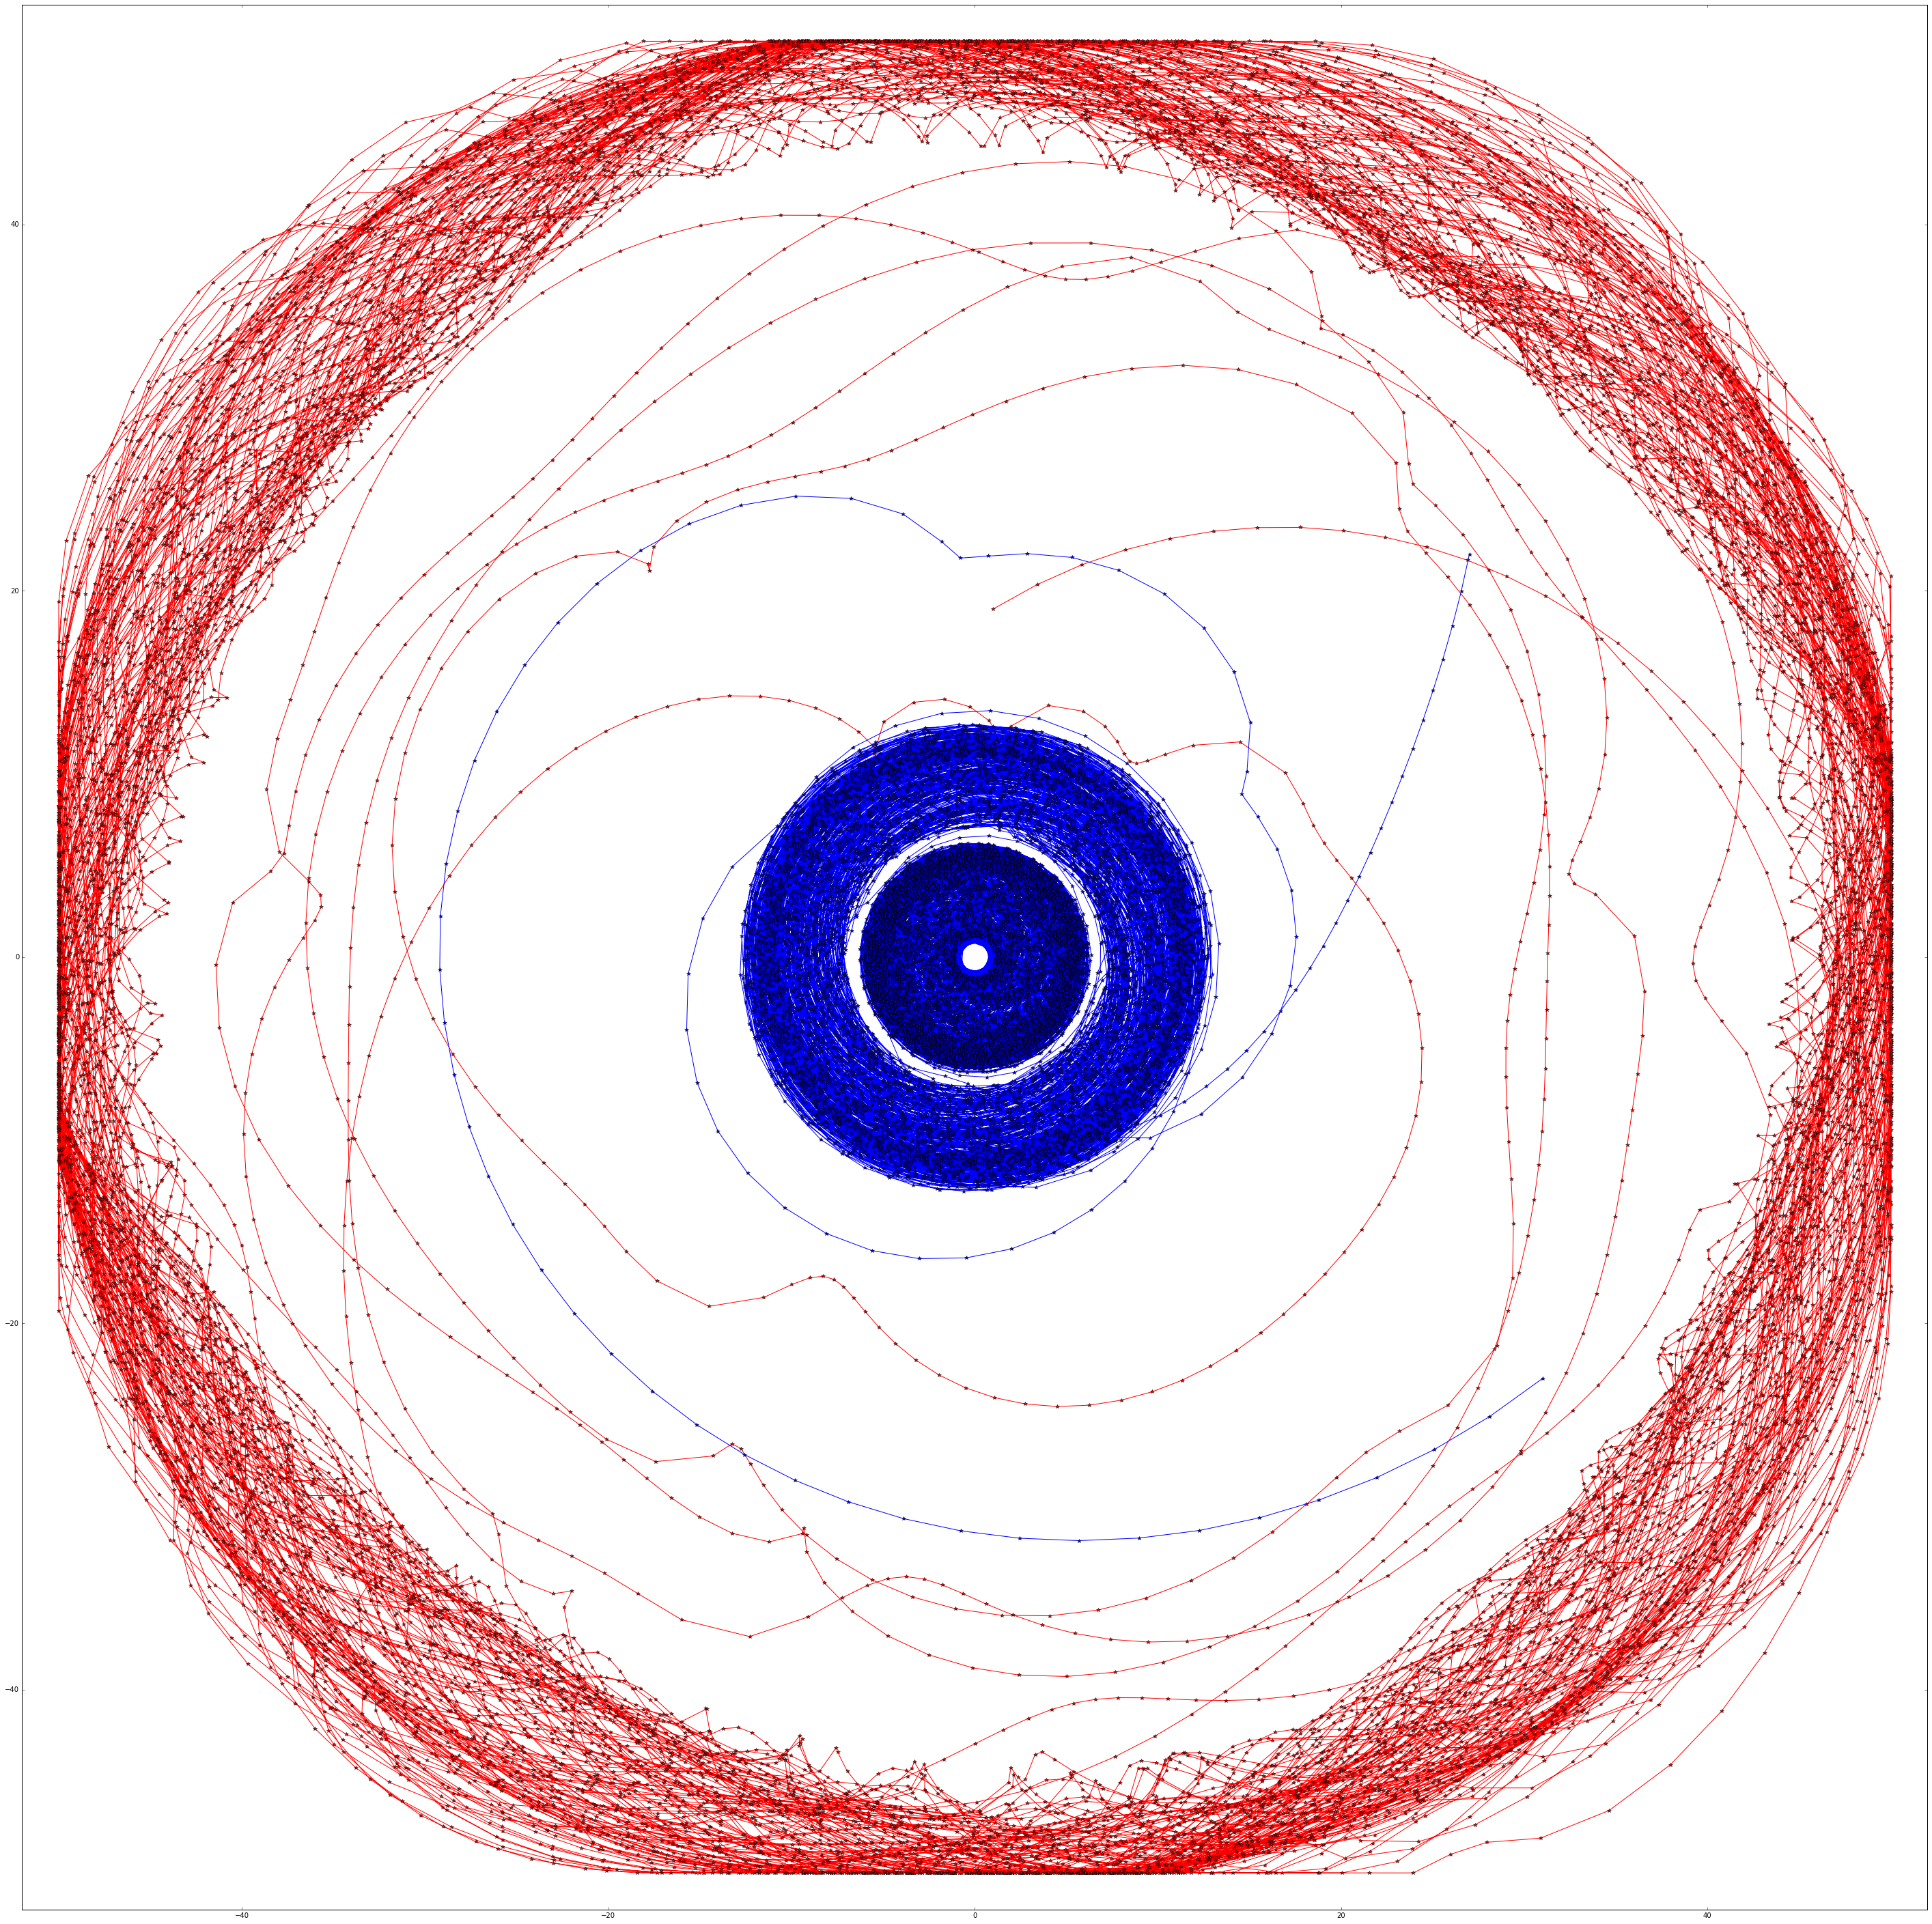

In [9]:
for i in range(10000):
    simulate_step()
plot_points()

In [10]:
for system in pressure_systems:
    print system[t]

red
blue
red
blue
